In [1]:
import numpy as np
import keras

Using TensorFlow backend.


## Load Dataset

In [2]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()
 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualize

[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

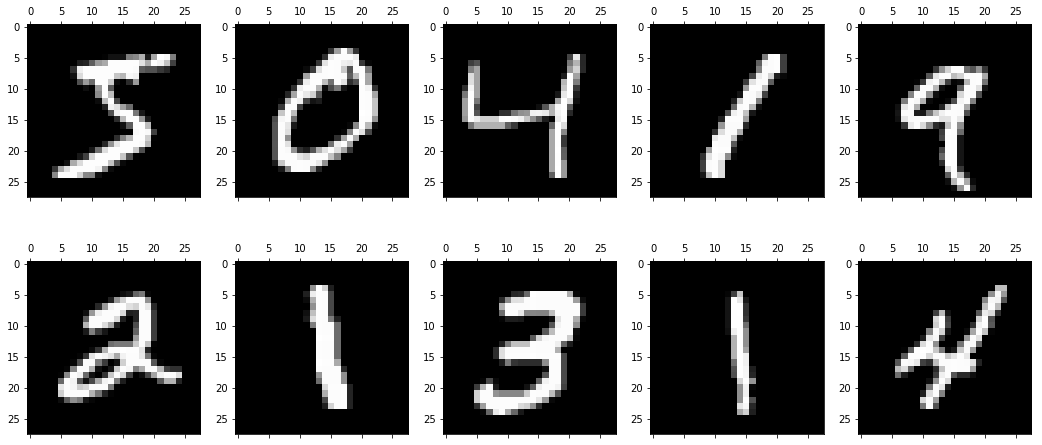

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Preprocessing

In [4]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [5]:
from keras.utils import to_categorical

# One hot encoding을 합니다.
# np.eye(10)[y_train]과 동일합니다.
y_train_hot = to_categorical(y_train)

# np.eye(10)[y_test]와 동일합니다.
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(60000, 10) (10000, 10)


## Build a Model

### Single-layer Neural Network

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=10,
                kernel_initializer=RandomUniform(minval=0.0, maxval=0.001),
                input_shape=(28 * 28,)))
model.add(Activation('sigmoid'))

optimizers = SGD(lr=0.00001)
model.compile(optimizer=optimizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(X_train,
          y_train_hot,
          epochs=20,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 24us/step - loss: 2.3021 - acc: 0.1512 - val_loss: 2.3004 - val_acc: 0.1467
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 1.6730 - acc: 0.1173 - val_loss: 1.0277 - val_acc: 0.1136
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 1.0223 - acc: 0.1137 - val_loss: 1.0065 - val_acc: 0.1147
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.9992 - acc: 0.1165 - val_loss: 0.9851 - val_acc: 0.1163
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.9878 - acc: 0.1206 - val_loss: 0.9851 - val_acc: 0.1230
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.9808 - acc: 0.1235 - val_loss: 0.9835 - val_acc: 0.1269
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.9765 - acc: 0.1275 - val_loss: 0.9806 - val_acc

In [8]:
import pandas as pd

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.918000


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


### Multi-layer Neural Network

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=1000,
                kernel_initializer=RandomUniform(minval=-0.058, maxval=0.058),
                input_shape=(28 * 28,)))
model.add(Activation('sigmoid'))
model.add(Dense(units=10,
                kernel_initializer=RandomUniform(minval=-0.077, maxval=0.077)))

model.add(Activation('sigmoid'))

optimizers = SGD(lr=0.0001)
model.compile(optimizer=optimizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train,
          y_train_hot,
          epochs=20,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 147us/step - loss: 2.2684 - acc: 0.1318 - val_loss: 2.1555 - val_acc: 0.2024
Epoch 2/20
60000/60000 [==============================] - 9s 150us/step - loss: 2.0597 - acc: 0.3060 - val_loss: 1.9186 - val_acc: 0.4667
Epoch 3/20
60000/60000 [==============================] - 9s 146us/step - loss: 1.7453 - acc: 0.5675 - val_loss: 1.5253 - val_acc: 0.6683
Epoch 4/20
60000/60000 [==============================] - 9s 148us/step - loss: 1.3595 - acc: 0.7059 - val_loss: 1.1769 - val_acc: 0.7524
Epoch 5/20
60000/60000 [==============================] - 9s 150us/step - loss: 1.0792 - acc: 0.7723 - val_loss: 0.9575 - val_acc: 0.8033
Epoch 6/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.9039 - acc: 0.8089 - val_loss: 0.8213 - val_acc: 0.8309
Epoch 7/20
60000/60000 [==============================] - 10s 164us/step - loss: 0.7887 - acc: 0.8311 - val_loss: 0.7292 -

In [ ]:
import pandas as pd

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)